In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import explained_variance_score

In [2]:
dataset = pd.read_csv("전체데이터통합.csv",encoding='cp949')
X, y = dataset.iloc[:, 3 :-1], dataset.iloc[:, -1]

In [3]:
data_dmatrix = xg.DMatrix(data=X,label=y)

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.2, random_state = 42)

In [5]:
xgb_model = xg.XGBRegressor( n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(train_X,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
predictions = xgb_model.predict(test_X)
predictions

array([ 687593.4 ,  252707.34, 1784906.4 , ..., 1952312.2 ,  465811.16,
       3089149.2 ], dtype=float32)

In [7]:
r_sq = xgb_model.score(train_X, train_y)
print('RMSE : {:.3f}'.format(np.sqrt(MSE(test_y, predictions))))
print(r_sq)
print(explained_variance_score(predictions,test_y))

RMSE : 348417.558
0.9825016147433201
0.9665268168151335


In [8]:
#CV로 학습

params = {'learning_rate': 0.08, 'gamma' : 0, 'subsample' : 0.75, 'colsample_bytree' : 1, 'max_depth' : 7}

cv_results = xg.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=42)

In [9]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.709141e+06,10723.724190,2.709354e+06,21488.611895
1,2.500843e+06,9864.518054,2.501623e+06,20901.616568
2,2.309459e+06,9085.593496,2.310463e+06,19944.703066
3,2.133729e+06,8609.117043,2.135206e+06,18932.550115
4,1.972807e+06,8102.710936,1.975029e+06,17963.711816


In [10]:
#CV 마지막 결과값 출력 - RMSE값이 더 높기 때문에 사용하지 않음
print((cv_results["test-rmse-mean"]).tail(1))

49    391991.09375
Name: test-rmse-mean, dtype: float64


In [11]:
#xgboost tree 도표 시각회 - 트리가 제대로 나오지 않음, 해결 필요

import matplotlib.pyplot as plt

xg.plot_tree(xgb_model,num_trees= 0)
plt.rcParams['figure.figsize'] = [400, 10]
plt.show()

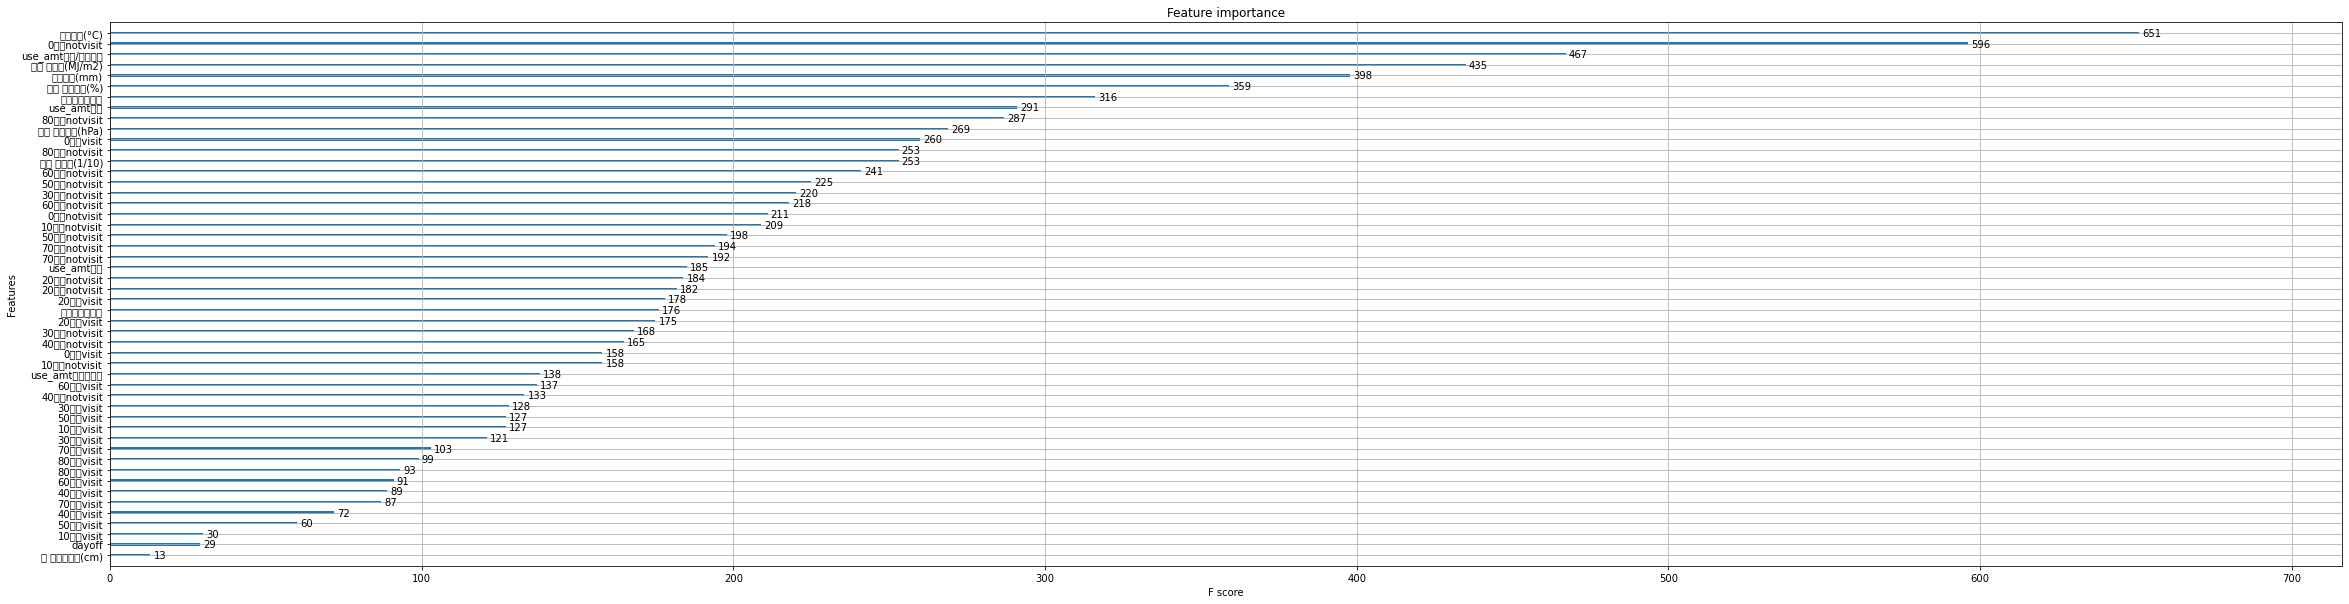

In [13]:
#feature importance 순위 시각화 - 한글폰트 필요, 기온이랑 0세 방문객이 1,2위인 점에서 모델 수정이 필요하지 않을까 싶습니다.
xg.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [40,100]
plt.show()